In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing # To load the dataset
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# --- 1. Load the Dataset ---
# Fetch the California housing dataset directly from scikit-learn
print("Loading California Housing dataset...")
housing = fetch_california_housing(as_frame=True)
df = housing.frame
print("Dataset loaded successfully!")
print(f"Data shape: {df.shape}")
print("Features available:", housing.feature_names)
print("Target variable:", housing.target_names[0])


Loading California Housing dataset...
Dataset loaded successfully!
Data shape: (20640, 9)
Features available: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: MedHouseVal


In [ ]:
# Separate features (X) and target (y)
X = df[housing.feature_names]
y = df[housing.target_names[0]]


In [ ]:
# --- 2. Data Preprocessing ---
# The California Housing dataset is relatively clean, so we primarily need scaling.
# No categorical features to OneHotEncode, and usually no missing values.

print("\nSplitting data into training and validation sets...")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")



Splitting data into training and validation sets...
Training data shape: (16512, 8)
Validation data shape: (4128, 8)


In [ ]:
# Initialize the StandardScaler
# It's important to fit the scaler only on the training data to prevent data leakage.
scaler = StandardScaler()

print("\nScaling numerical features...")
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


Scaling numerical features...


In [ ]:
# Convert scaled arrays back to DataFrames with original column names for clarity
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
print("Features scaled.")

Features scaled.


In [ ]:
# --- 3. Build and Train the Linear Regression Model ---

# Initialize the Linear Regression model
model = LinearRegression()

print("\nTraining the Linear Regression model...")
model.fit(X_train_scaled_df, y_train)
print("Model training complete.")


Training the Linear Regression model...
Model training complete.


In [ ]:
# --- 4. Make Predictions and Evaluate the Model ---

# Make predictions on the scaled validation set
y_pred = model.predict(X_val_scaled_df)


In [ ]:

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_val, y_pred)

print(f"\n--- Model Evaluation on Validation Set ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.4f}")



--- Model Evaluation on Validation Set ---
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
R-squared (R2 Score): 0.5758


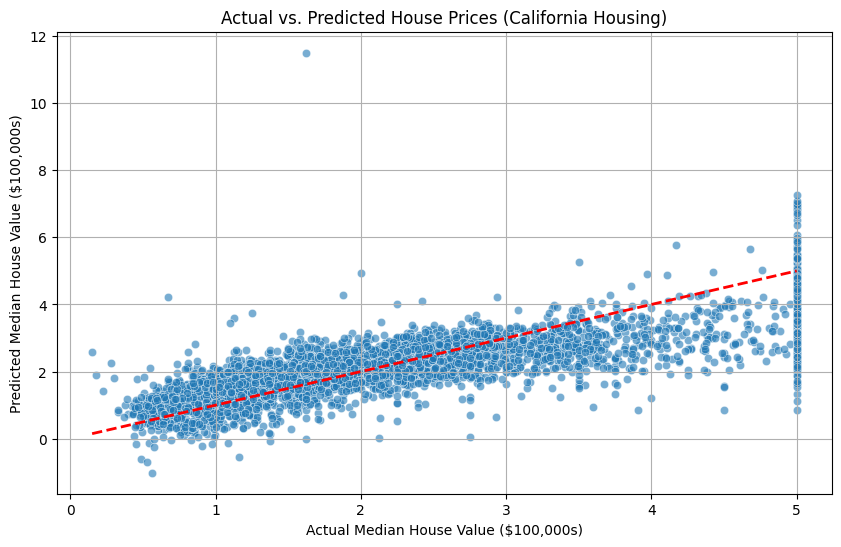

In [ ]:


# Visualize actual vs. predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted House Prices (California Housing)')
plt.xlabel('Actual Median House Value ($100,000s)')
plt.ylabel('Predicted Median House Value ($100,000s)')
plt.grid(True)
plt.show()


In [ ]:

# Optional: Display model coefficients
print("\n--- Model Coefficients ---")
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients_df.sort_values(by='Coefficient', ascending=False))



--- Model Coefficients ---
      Feature  Coefficient
0      MedInc     0.854383
3   AveBedrms     0.339259
1    HouseAge     0.122546
4  Population    -0.002308
5    AveOccup    -0.040829
2    AveRooms    -0.294410
7   Longitude    -0.869842
6    Latitude    -0.896929
